In [26]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import numpy as np
from util import calculate_valid_move_actions

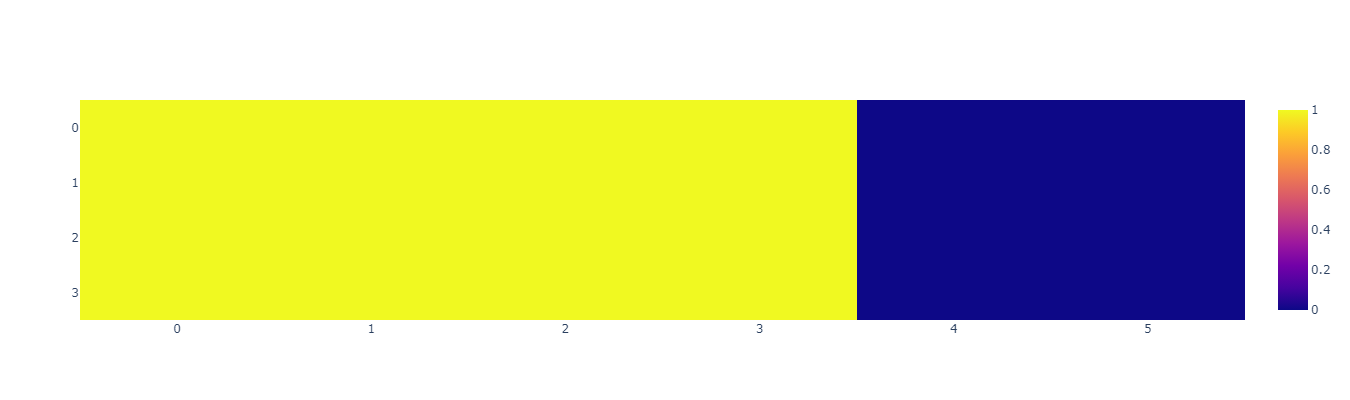

In [67]:
allowed_map = np.array(
    [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]]
)
util.show_map_array(allowed_map).update_layout(height=400, width=500).show()

In [68]:
# Test true cases
move_right = np.array([0, util.RIGHT, 0, 0, 0, 1])
move_down = np.array([0, util.DOWN, 0, 0, 0, 1])
move_right_n = np.array([0, util.RIGHT, 0, 0, 0, 2])
move_right_repeat = np.array([0, util.RIGHT, 0, 0, 1, 1])

actions = [move_right, move_right_n]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=10, ignore_repeat=False
)
print(valid)
print(len(valid.valid_actions) == 2)

actions = [move_right, move_down]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=10, ignore_repeat=False
)
print(valid)
print(len(valid.valid_actions) == 2)

actions = [move_right_repeat]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=3, ignore_repeat=False
)
print(valid)
print(len(valid.valid_actions) == 3)
print(len(valid.invalid_reasons))

ValidActions(was_valid=True, valid_actions=[array([0, 2, 0, 0, 0, 1]), array([0, 2, 0, 0, 0, 2])], invalid_steps=[], invalid_reasons=[])
True
ValidActions(was_valid=True, valid_actions=[array([0, 2, 0, 0, 0, 1]), array([0, 3, 0, 0, 0, 1])], invalid_steps=[], invalid_reasons=[])
True
ValidActions(was_valid=True, valid_actions=[array([0, 2, 0, 0, 1, 1]), array([0, 2, 0, 0, 1, 1]), array([0, 2, 0, 0, 0, 1])], invalid_steps=[], invalid_reasons=[])
True
0


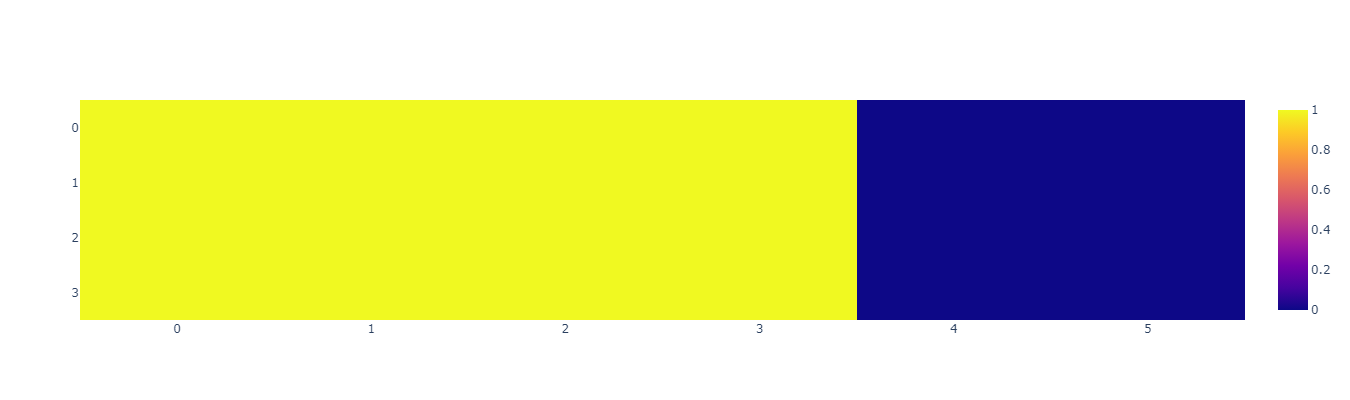

In [69]:
util.show_map_array(allowed_map).update_layout(height=400, width=500).show()

In [76]:
# Test invalid cases
move_right = np.array([0, util.RIGHT, 0, 0, 0, 1])
move_down_4 = np.array([0, util.DOWN, 0, 0, 0, 4])
move_up = np.array([0, util.UP, 0, 0, 0, 1])
move_right_n = np.array([0, util.RIGHT, 0, 0, 0, 4])
move_right_repeat = np.array([0, util.RIGHT, 0, 0, 1, 1])

# Out of index (less than zero)
actions = [move_right, move_up]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=10, ignore_repeat=False
)
print(valid)
print(valid.invalid_reasons[0] == "index_error")

# Out of index (greater than max)
actions = [move_right, move_down_4]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=10, ignore_repeat=False
)
print(valid)
print(valid.invalid_reasons[0] == "index_error")

# Blocked no repeat
actions = [move_right, move_right_n]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=10, ignore_repeat=False
)
print(valid)
print(valid.invalid_reasons[0] == "blocked")

# Blocked with repeat
actions = [move_right_repeat]
valid = calculate_valid_move_actions(
    (0, 0), actions, valid_move_map=allowed_map, max_len=5, ignore_repeat=False
)
print(valid)
print(len(valid.valid_actions) == 5)
print(valid.invalid_reasons[0] == "blocked")

ValidActions(was_valid=False, valid_actions=[array([0, 2, 0, 0, 0, 1]), array([0, 0, 0, 0, 0, 1])], invalid_steps=[1], invalid_reasons=['index_error'])
True
ValidActions(was_valid=False, valid_actions=[array([0, 2, 0, 0, 0, 1]), array([0, 3, 0, 0, 0, 3]), array([0, 0, 0, 0, 0, 1])], invalid_steps=[4], invalid_reasons=['index_error'])
True
ValidActions(was_valid=False, valid_actions=[array([0, 2, 0, 0, 0, 1]), array([0, 2, 0, 0, 0, 2]), array([0, 0, 0, 0, 0, 2])], invalid_steps=[3, 4], invalid_reasons=['blocked', 'blocked'])
True
ValidActions(was_valid=False, valid_actions=[array([0, 2, 0, 0, 1, 1]), array([0, 2, 0, 0, 1, 1]), array([0, 2, 0, 0, 1, 1]), array([0, 0, 0, 0, 0, 1]), array([0, 0, 0, 0, 0, 1])], invalid_steps=[3, 4], invalid_reasons=['blocked', 'blocked'])
True
True
